<a href="https://colab.research.google.com/github/frctlprdx/Face-Detection/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw
from mtcnn import MTCNN
import numpy as np
import os
import cv2
import h5py

#Access Your Personal Google Drive

In [ ]:
#Access Google Drive

drive.mount('/content/drive')

#Access the Data Folder

In [22]:
#Path To folder

path = "/content/drive/MyDrive/nist_2/"

#Check Each Folder

In [21]:
#Check the path

if os.path.exists(path):
    print("Folder Exist")
else:
    print("Folder Not Exist")

Folder Exist


In [20]:
train_path = '/content/drive/MyDrive/nist_2/train'

if os.path.exists(train_path):
    print("Folder Exist")
else:
    print("Folder Not Exist")

Folder Exist


In [19]:
subfolder_name = 'sample train_augment'
augtrain_path = os.path.join(path, subfolder_name)

if os.path.exists(augtrain_path):
    print("Folder Exist")
else:
    print("Folder Not Exist")

Folder Exist


In [18]:
val_path = '/content/drive/MyDrive/nist_2/val'

if os.path.exists(val_path):
    print("Folder Exist!")
else:
    print("Folder Not Exist.")

Folder Exist!


#1. Preprocessing

##1.1. Draw Bounding Boxes each Photos

In [ ]:
# 1. Inisialisasi path
train_dir = '/content/drive/MyDrive/nist_2/train'
output_dir = '/content/drive/MyDrive/bounding_boxes/training'

# Pastikan MTCNN detector sudah diinisialisasi
detector = MTCNN()

# Fungsi untuk mendeteksi wajah dan menambahkan bounding box
def process_image(image_path, output_path):
    image = Image.open(image_path)
    image_np = np.array(image)

    # Mendeteksi wajah menggunakan MTCNN
    faces = detector.detect_faces(image_np)

    # Jika ada wajah yang terdeteksi, tambahkan bounding box
    if faces:
        for face in faces:
            x, y, width, height = face['box']
            # Draw rectangle (bounding box) di sekitar wajah
            image_np = np.array(image)
            image_with_box = Image.fromarray(image_np)
            draw = ImageDraw.Draw(image_with_box)
            draw.rectangle([x, y, x + width, y + height], outline="red", width=3)
            image_with_box.save(output_path)
    else:
        print(f"No face detected in {image_path}")

# 2. Looping melalui folder dan gambar
for folder_name in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder_name)

    if os.path.isdir(folder_path):  # Pastikan itu adalah folder
        # Buat folder tujuan di dalam bounding_boxes/training
        output_folder_path = os.path.join(output_dir, folder_name)
        os.makedirs(output_folder_path, exist_ok=True)

        # Looping gambar di dalam folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            output_image_path = os.path.join(output_folder_path, image_name)

            # Tambahkan bounding box dan simpan hasilnya
            process_image(image_path, output_image_path)

print("Proses selesai, semua gambar telah diproses dengan bounding box.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

####Check Total Pictures

In [16]:
# Menghitung total gambar di dalam semua subfolder
total_images = 0

# Looping melalui semua folder dan subfolder
for root, dirs, files in os.walk(output_dir):
    for file in files:
        # Jika file adalah gambar (dengan ekstensi yang diinginkan)
        if file.endswith(('.ppm')):  # Tambahkan ekstensi gambar lainnya jika perlu
            total_images += 1

print(f"Total Photos in Bounding Boxes Folder {total_images}")


Total Photos in Bounding Boxes Folder 393


##1.2. Resize Image

###1.2.1. How if photos less than 400x400


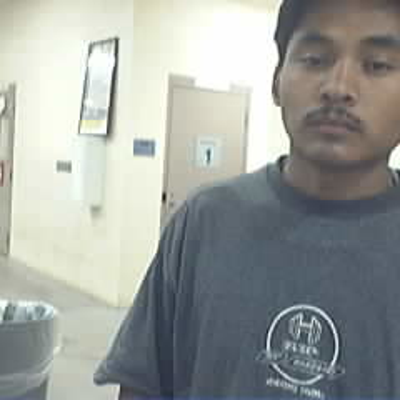

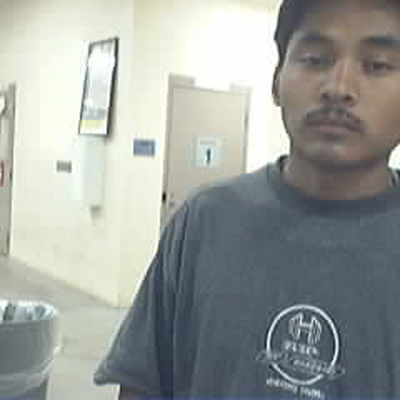

(None, None)

In [ ]:
from PIL import Image, ImageOps
from IPython.display import display

image = Image.open("/content/drive/MyDrive/nist_2/train/S185/S185-01-t10_01.ppm")

# Padding gambar menjadi 400x400
image_padded = ImageOps.pad(image, (400, 400), color='black')
image_resized = ImageOps.fit(image, (400, 400), method=Image.LANCZOS)

display(image_padded), display(image_resized)